[@LorenaABarba](https://twitter.com/LorenaABarba)

##### Version 0.2 -- February 2014

# Doublet

Welcome to the third lesson of *AeroPython*! We created some very interesting potential flows in lessons 1 and 2, with our [Source & Sink](http://nbviewer.ipython.org/github/barbagroup/AeroPython/blob/master/lessons/01_Lesson01_sourceSink.ipynb) notebook, and our [Source & Sink in a Freestream](http://nbviewer.ipython.org/github/barbagroup/AeroPython/blob/master/lessons/02_Lesson02_sourceSinkFreestream.ipynb) notebook.

Think about the Source & Sink again, and now imagine that you are looking at this flow pattern from very far away. The streamlines that are between the source and the sink will be very short, from this vantage point. And the other streamlines will start looking like two groups of circles, tangent at the origin. If you look from far enough away, the distance between source and sink approaches zero, and the pattern you see is called a *doublet*.

Let's see what this looks like. First, load our favorite libraries.

In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In the previous notebook, we saw that a source-sink pair in a uniform flow can be used  to represent the streamlines around a particular shape, named a Rankine oval. In this notebook, we will turn that source-sink pair into a doublet.

First, consider a source of strength $\sigma$ at $\left(-\frac{l}{2},0\right)$ and a sink of opposite strength located at $\left(\frac{l}{2},0\right)$. Here is a sketch to help you visualize the situation:

<center>![image](files/resources/doubletSketch1.png)</center>

The stream-function associated to the source-sink pair, evaluated at point $\text{P}\left(x,y\right)$, is

$$\psi\left(x,y\right) = \frac{\sigma}{2\pi}\left(\theta_1-\theta_2\right) = -\frac{\sigma}{2\pi}\Delta\theta$$

Let the distance $l$ between the two singularities approach zero while the strength magnitude is increasing so that the product $\sigma l$ remains constant. In the limit, this flow pattern is a *doublet* and we define its strength by $\kappa = \sigma l$.

The stream-function of a doublet, evaluated at point $\text{P}\left(x,y\right)$, is given by

$$\psi\left(x,y\right) = \lim \limits_{l \to 0} \left(-\frac{\sigma}{2\pi}d\theta\right) \quad \text{and} \quad \sigma l = \text{constant}$$

<center>![image](files/resources/doubletSketch2.png)</center>

Considering the case where $d\theta$ is infinitesimal, we deduce from the figure above that

$$a = l\sin\theta$$

$$b = r-l\cos\theta$$

$$d\theta = \frac{a}{b} = \frac{l\sin\theta}{r-l\cos\theta}$$

so the stream function becomes

$$\psi\left(r,\theta\right) = \lim \limits_{l \to 0} \left(-\frac{\sigma l}{2\pi}\frac{\sin\theta}{r-l\cos\theta}\right) \quad \text{and} \quad \sigma l = \text{constant}$$

i.e.

$$\psi\left(r,\theta\right) = -\frac{\kappa}{2\pi}\frac{\sin\theta}{r}$$

In Cartesian coordinates, a doublet located at the origin has the stream function

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2}$$

from which we can derive the velocity components

$$u\left(x,y\right) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$$

$$v\left(x,y\right) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$

Now we have done the math, it is time to code and visualize what the streamlines look like. We start by creating a mesh grid.

In [3]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = np.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [9]:
kappa = 1.0                        # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0    # location of the doublet

In [10]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """Returns the velocity field generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    u = - strength/(2*pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """Returns the stream-function generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    psi = - strength/(2*pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [11]:
# computes the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# computes the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

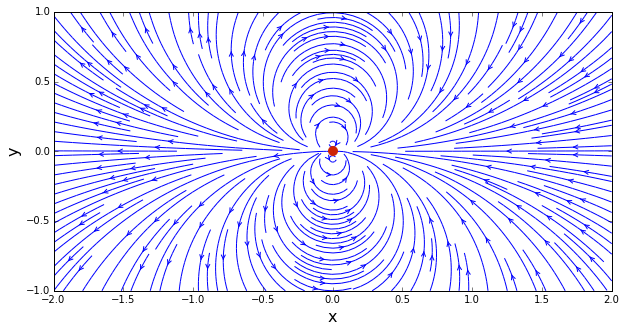

In [12]:
%matplotlib inline

# plots the streamlines
size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet, 
               density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

### Uniform flow past a doublet

In [14]:
u_inf = 1.0        # freestream speed

In [15]:
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

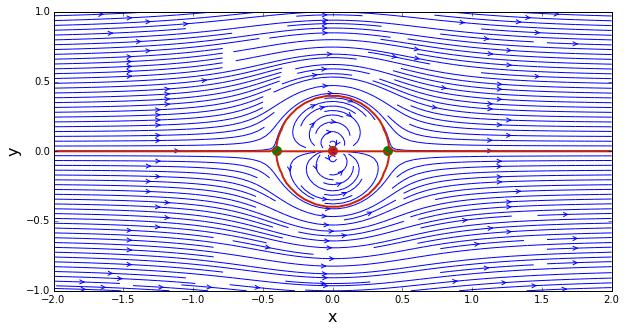

In [16]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plots the streamlines
size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculates the stagnation points
x_stagn1, y_stagn1 = +sqrt(kappa/(2*pi*u_inf)), 0
x_stagn2, y_stagn2 = -sqrt(kappa/(2*pi*u_inf)), 0

# adds the stagnation points to the figure
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

## Calculate doublet radius

Stream function for doulet

$\psi\left(r,\theta\right) = -\frac{\kappa}{2\pi}\frac{\sin\theta}{r}$

Superposing doublet and uniform flow

$\psi\ = u_\infty y + v_\infty x -\frac{\kappa}{2\pi}\frac{\sin\theta}{r}$

If uniform flow is parallel to the x-axis, using $y = rsin\theta$, and defining $a^2 = \frac{\kappa}{2\pi U_\infty}$, we get

$\psi\ = u_\infty y (1-\frac{a^2}{r^2})$

$\psi$ is zero for $r = a$, therefore for superposition of a doublet in uniform flow the flow pattern is that of flow over a cylinder of radius $a$

Therefore, the radius of the doublet is calculated as;

$$Doublet Radius = \sqrt{\frac{\kappa}{2\pi U_\infty}}$$

### Bernoulli's equation and the pressure coefficient

A very useful measurement of a flow around a body is the *coefficient of pressure* $C_p$. To evaluate the pressure coefficient, we apply *Bernoulli's equation* for ideal flow, which says that along a streamline we can apply the following between two points:

$$p_\infty + \frac{1}{2}\rho U_\infty^2 = p + \frac{1}{2}\rho U^2$$

We define the pressure coefficient as the ratio between the pressure difference with the free stream, and the dynamic pressure:

$$C_p = \frac{p-p_\infty}{\frac{1}{2}\rho U_\infty^2}$$

i.e.,

$$C_p = 1 - \left(\frac{U}{U_\infty}\right)^2$$

In an incompressible flow, $C_p=1$ at a stagnation point. Let's plot the pressure coefficient in the whole domain.

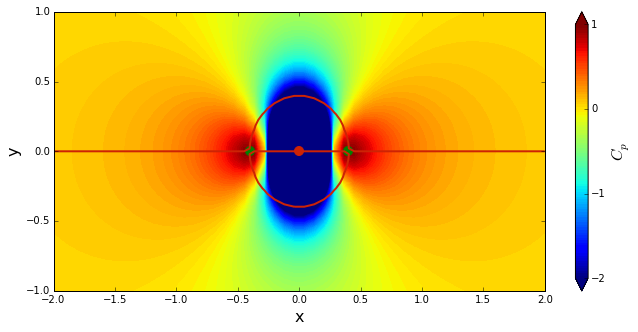

In [19]:
# computes the pressure coefficient field
cp = 1.0 - (u**2+v**2)/u_inf**2

# plots the pressure coefficient field
size = 10
plt.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X, Y, cp, levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
plt.contour(X,Y,psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

##### Challenge task

Show that the pressure coefficient distribution on the surface of the circular cylinder is given by

$$C_p = 1-4\sin^2\theta$$

and plot the coefficient of pressure versus the angle.

Velocity components in cylindrical co-ordinates

$u\left(r\right) = \frac{1}{r}\frac{\partial\psi}{\partial\theta} = U_\infty cos\theta(1 - \frac{R^2}{r^2})$

$u\left(\theta\right) = - \frac{\partial\psi}{\partial r} = - U_\infty sin\theta(1 + \frac{R^2}{r^2})$

On surface of cylinder $r = R$,  so

$U_r = 0$

$U_\theta = - 2U_\infty sin\theta$

Surface pressure is obtained from Bernoulli's equation;

$p(\theta) = p_o + \frac{1}{2} \rho(U_r ^2 + U_\theta ^2)$

Substituting $U_r = 0$ and $U_\theta (\theta)$ and using the freestream value for the total pressure;

$$p_o = p_\infty + \frac{1}{2} \rho U_\infty ^2$$

Gives the following surface pressure distribution

$p(\theta) = p_\infty + \frac{1}{2} \rho U_\infty ^2 (1 - 4sin^2\theta)$

Pressure coefficient

$C_p (\theta) = \frac{p(\theta) - p_\infty}{\frac{1}{2} \rho U_\infty ^2} = 1 - 4sin^2\theta$

Plotting surface pressure coefficient with angle

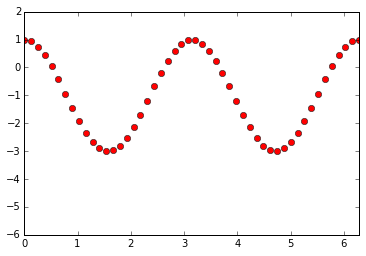

In [28]:
# angle
theta = np.linspace(0,2*pi,50)

# computes the surface pressure coefficient
cp = 1.0 - (4*(np.sin(theta))**2)

plt.plot([theta], [cp], 'ro')
plt.axis([0, 2*pi, -6, 2])
plt.show()